In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [50]:
crimeHousing = pd.read_csv('crime-housing-austin-2015.csv')
zipCodes = pd.read_csv('AustinZipCodes.csv')
pd.set_option('display.max_columns', None)

# Crime per Month

# Housing vs Crime

In [51]:
crimeAustin = crimeHousing[crimeHousing.Zip_Code_Housing.notna()]
crimeAustin = crimeHousing[['Highest_NIBRS_UCR_Offense_Description','Zip_Code_Crime']].reset_index()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Robbery'),
  Text(1, 0, 'Burglary'),
  Text(2, 0, 'Auto Theft'),
  Text(3, 0, 'Agg Assault'),
  Text(4, 0, 'Theft'),
  Text(5, 0, 'Rape'),
  Text(6, 0, 'Murder')])

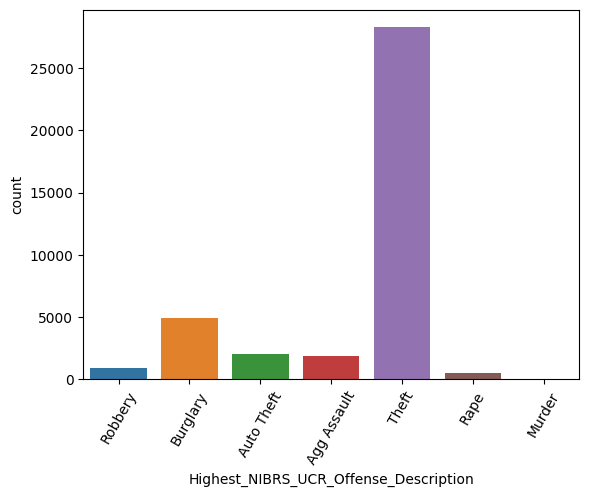

In [52]:
sns.countplot(x='Highest_NIBRS_UCR_Offense_Description', data=crimeAustin)
plt.xticks(rotation=60)

Text(0, 0.5, 'Amount of Thefts')

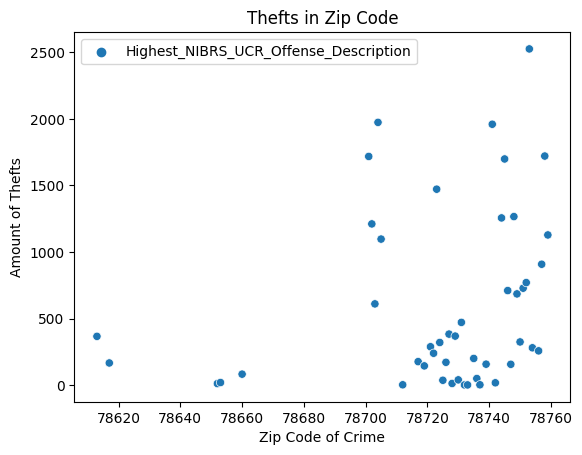

In [80]:
theft = crimeAustin[(crimeAustin.Highest_NIBRS_UCR_Offense_Description == "Theft")]
theft = theft[theft.Zip_Code_Crime.notna()]
theft.Zip_Code_Crime = theft.Zip_Code_Crime.astype('int')
theftCrime = theft.groupby('Zip_Code_Crime').agg({'Highest_NIBRS_UCR_Offense_Description': 'count'})
theftCrime.sort_values(by=['Highest_NIBRS_UCR_Offense_Description'])
ax = sns.scatterplot(data=theftCrime)
ax.set_title('Thefts in Zip Code')
ax.set_xlabel('Zip Code of Crime')
ax.set_ylabel('Amount of Thefts')

C:\Users\Abbey\AppData\Local\Temp\ipykernel_15036\2565709133.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  housing['Medianhouseholdincome'] = housing['Medianhouseholdincome'].str.replace('$', '').astype('float')


Text(0, 0.5, 'Median Household Income')

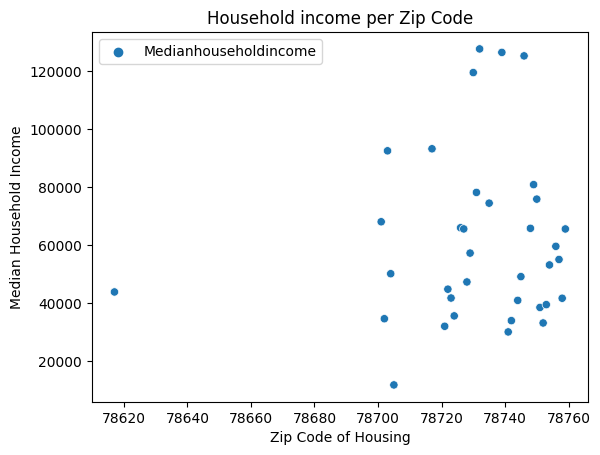

In [81]:
housing = crimeHousing[['Zip_Code_Housing', 'Medianhouseholdincome']].reset_index()
housing = housing[housing.Zip_Code_Housing.notna()]
housing.Zip_Code_Housing = housing.Zip_Code_Housing.astype('int')
housing['Medianhouseholdincome'] = housing['Medianhouseholdincome'].str.replace('$', '').astype('float')
housing = housing.groupby('Zip_Code_Housing').agg({'Medianhouseholdincome': 'mean'})
housing.sort_values(by='Zip_Code_Housing')
ax = sns.scatterplot(data=housing)
ax.set_title('Household income per Zip Code')
ax.set_xlabel('Zip Code of Housing')
ax.set_ylabel('Median Household Income')